In [1]:
%run setup.ipynb

In [2]:
def plot_h12(pop, chromosome, center, flank, ymax=1, ax=None, step=1, shift=0, markersize=4, legend=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
    ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
    xlim = center - flank, center + flank
    palette = sns.color_palette("Blues_d", 3)[::-1]
    windows, gwindows, h1, h12, h123, h2_h1 = load_h12_gwss(pop, chromosome)
    x = windows.mean(axis=1) / 1e6
    ax.plot(x[shift::step], h123[shift::step], linestyle=' ', marker='o', color=palette[0], markersize=markersize, label='H123')
    ax.plot(x[shift::step], h12[shift::step], linestyle=' ', marker='o', color=palette[1], markersize=markersize, label='H12')
    ax.plot(x[shift::step], h1[shift::step], linestyle=' ', marker='o', color=palette[2], markersize=markersize, label='H1')
    ax.xaxis.set_major_locator(MultipleLocator(.2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$H12$')
    pop_label = (
        pop_defs[pop]["label"]
        .replace('An. gambiae', '$An. gambiae$')
        .replace('An. coluzzii', '$An. coluzzii$')
    )
    ax.annotate(pop_label, xy=(0, 1), xycoords='axes fraction',
                xytext=(3, -3), textcoords='offset points', 
                fontsize=8, ha='left', va='top')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    

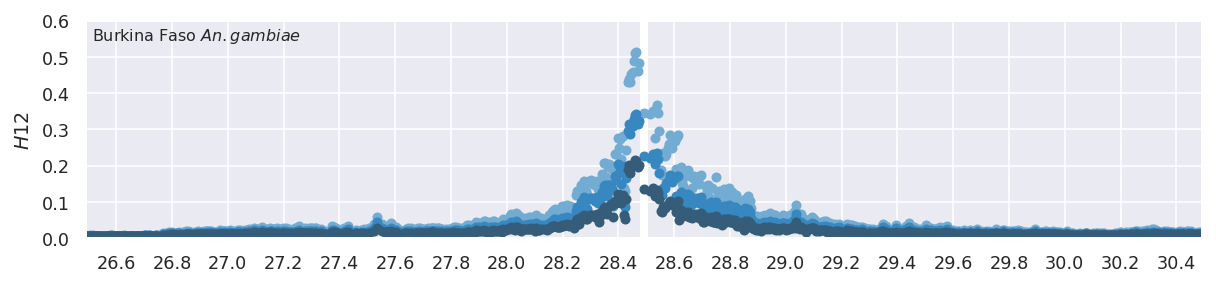

In [3]:
plot_h12('bf_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 2, ymax=.6, step=5, shift=3)

In [4]:
def plot_ihs(pop, chromosome, center, flank, ax=None, markersize=4, 
             window_size=200, window_step=100, step=2, shift=0, 
             legend=False, label=True, ymax=10):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
    ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
    palette = sns.color_palette("Reds_d", 4)[::-1]
    x, y_max, y_pc95, y_pc75, y_pc50 = load_ihs_gwss(pop, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6
    xlim = center - flank, center + flank
    ax.plot(x[shift::step], y_max.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x[shift::step], y_pc95.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x[shift::step], y_pc75.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x[shift::step], y_pc50.clip(0, 10)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    ax.xaxis.set_major_locator(MultipleLocator(.5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$|iHS|$')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pop_label = (
            pop_defs[pop]['label']
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(pop_label, xy=(0, 1), xytext=(3, -3), 
                    xycoords='axes fraction', textcoords='offset points', 
                    fontsize=8, va='top', ha='left')
    

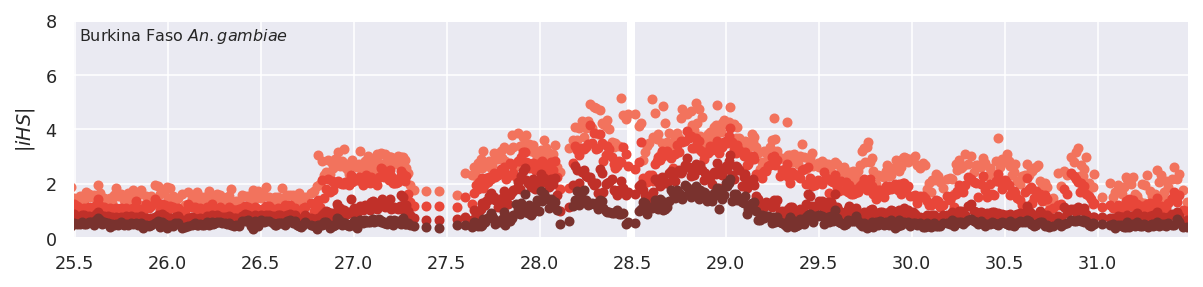

In [5]:
plot_ihs('bf_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, flank=3, ymax=8)

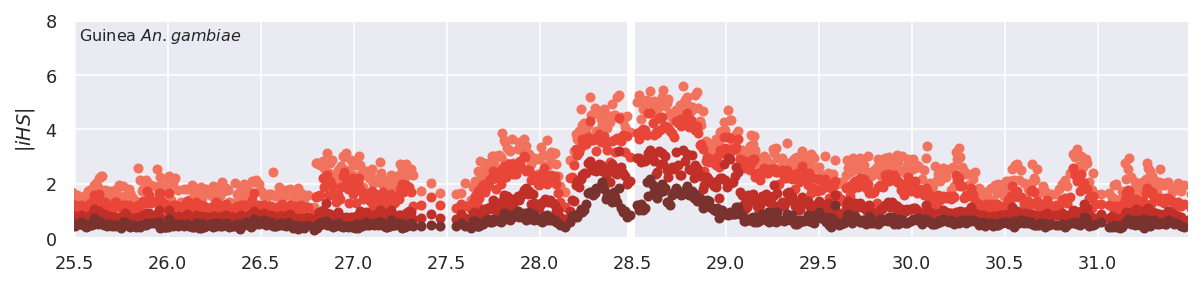

In [6]:
plot_ihs('gn_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, flank=3, ymax=8)

In [7]:
def plot_xpehh(pop1, pop2, chromosome, center, flank, ax=None, markersize=4, 
               window_size=500, window_step=250, step=1, shift=0, 
               legend=False, label=True, ymax=6):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
    ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
    palette = sns.color_palette("Greens_d", 4)[::-1]
    x, y_max, y_pc95, y_pc75, y_pc50 = load_xpehh_gwss(pop1, pop2, chromosome, window_size=window_size, window_step=window_step)
    x = x/1e6
    ax.plot(x[shift::step], y_max.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[0], label='$P_{100}$')
    ax.plot(x[shift::step], y_pc95.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[1], label='$P_{95}$')
    ax.plot(x[shift::step], y_pc75.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[2], label='$P_{75}$')
    ax.plot(x[shift::step], y_pc50.clip(0, 6)[shift::step], marker='o', linestyle=' ', markersize=markersize, color=palette[3], label='$P_{50}$')
    ax.xaxis.set_major_locator(MultipleLocator(.2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    xlim = center - flank, center + flank
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$XP-EHH$')
    if legend:
        lgd = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', facecolor='w', edgecolor='w')
        for handle in lgd.legendHandles:
            handle._legmarker.set_markersize(6)
    if label:
        pops_label = (
            f"{pop_defs[pop1]['label']} vs {pop_defs[pop2]['label']}"
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(pops_label, xy=(0, 1), xytext=(3, -3), 
                    xycoords='axes fraction', textcoords='offset points', 
                    fontsize=8, va='top', ha='left')
    

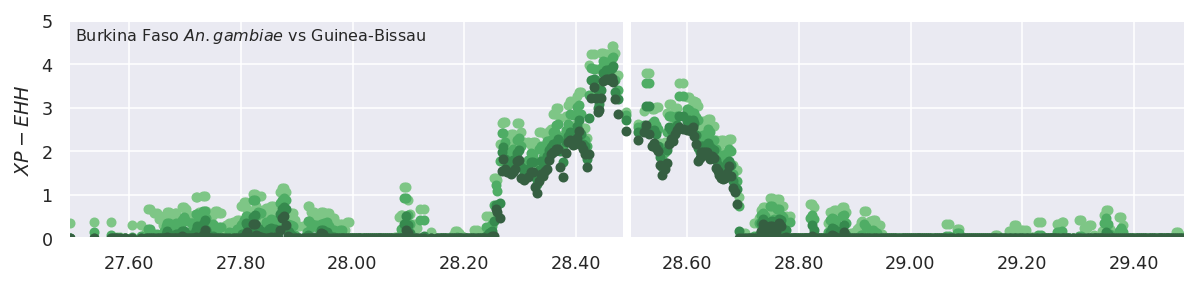

In [8]:
plot_xpehh('bf_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=1, shift=0, ymax=5)

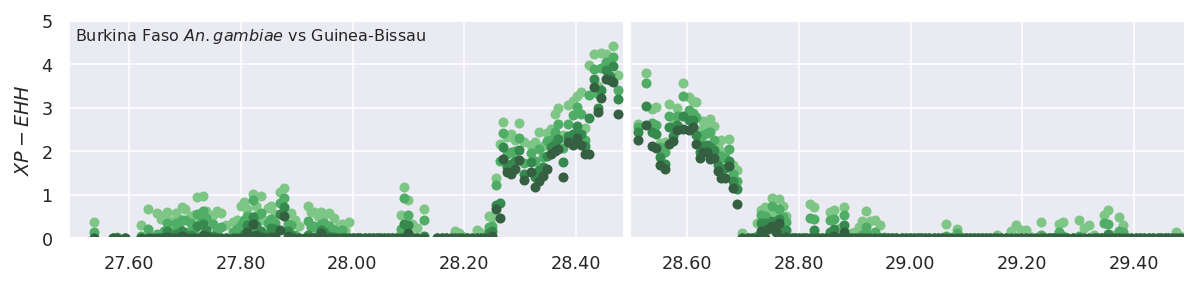

In [9]:
plot_xpehh('bf_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=2, shift=0, ymax=5)

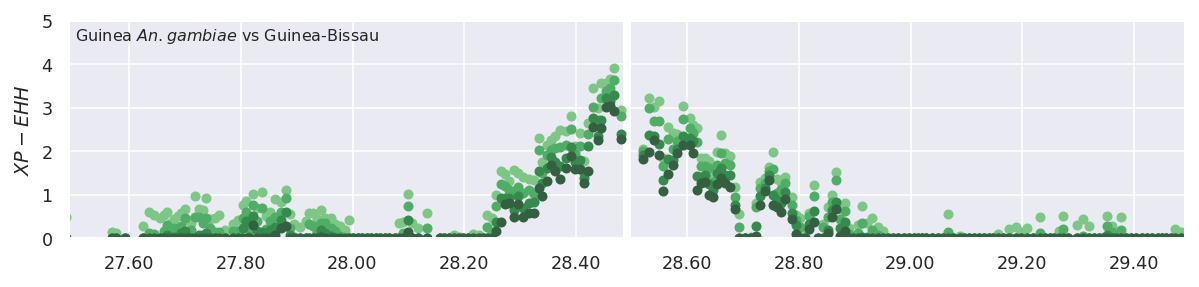

In [10]:
plot_xpehh('gn_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=2, shift=0, ymax=5)

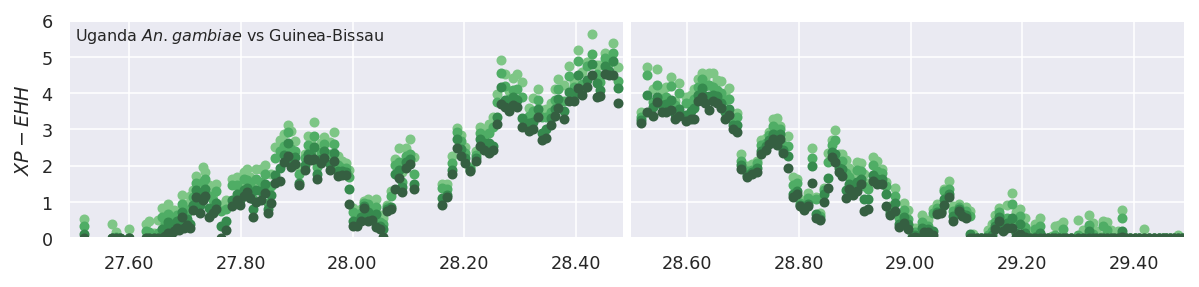

In [11]:
plot_xpehh('ug_gam', 'gw', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
           step=2, shift=0, ymax=6)

In [12]:
def plot_pbs(pop1, pop2, pop3, chromosome, center, flank, ax=None, 
             markersize=4, window_size=500, window_step=250, 
             step=2, shift=0, label=True, ymax=.4):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 2), facecolor='w')
    ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
    windows, gwindows, pbs, pbs_scaled = load_pbs_gwss(
        pop1, pop2, pop3, chromosome, window_size=window_size, window_step=window_step
    )
    x = windows.mean(axis=1)/1e6
    palette = sns.color_palette('Purples_d', 3)
    ax.plot(x[shift::step], pbs[shift::step], marker='o', linestyle=' ', markersize=markersize, 
            color=palette[1])
    ax.xaxis.set_major_locator(MultipleLocator(.2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    xlim = center - flank, center + flank
    ax.set_xlim(*xlim)
    ax.set_ylim(0, ymax)
    ax.set_ylabel('$PBS$')
    if label:
        pop1_label = pop_defs[pop1]["label"]
        pop2_label = pop_defs[pop2]["label"]
        pop3_label = pop_defs[pop3]["label"]
        annotation = (
            f'{pop1_label} vs. {pop2_label}, {pop3_label}'
            .replace("An. gambiae", "$An. gambiae$")
            .replace("An. coluzzii", "$An. coluzzii$")
        )
        ax.annotate(annotation, xy=(0, 1), xycoords='axes fraction', xytext=(3, -3), 
                    textcoords='offset points', fontsize=8, va='top', ha='left')
    

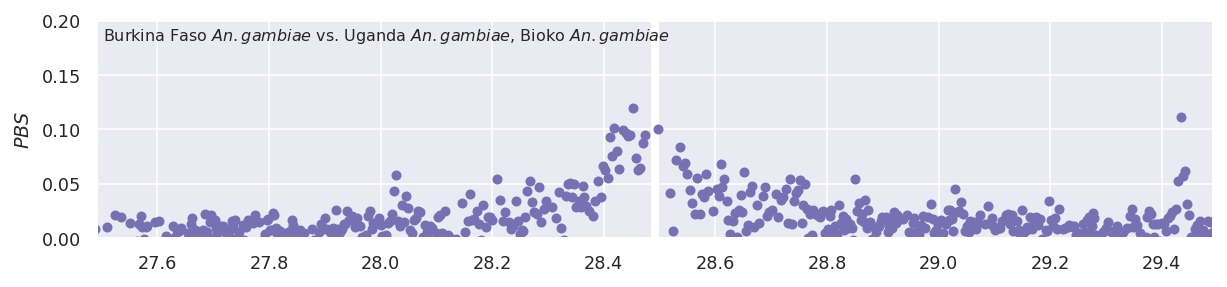

In [13]:
plot_pbs('bf_gam', 'ug_gam', 'gq_gam', cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1,
         ymax=.2)

In [16]:
def plot_genes(chromosome, center, flank, label, ax=None):
    palette = sns.color_palette()
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 1), facecolor='w')
    ax.axvline(center, color='w', linestyle='-', lw=4, zorder=0)
    xlim = center - flank, center + flank
    df_genes_plot = df_genes.query(f"chromosome == '{chromosome}' and chromosome_start < {xlim[1]*1e6} and chromosome_end > {xlim[0]*1e6}")
    fwd_genes = df_genes_plot.query("strand == '+'")
    rev_genes = df_genes_plot.query("strand == '-'")
    fwd_xranges = [
        (gene.chromosome_start/1e6, (gene.chromosome_end - gene.chromosome_start)/1e6)
        for _, gene in fwd_genes.iterrows()
    ]
    ax.broken_barh(fwd_xranges, (0.6, .3), edgecolor='k', facecolor='w', linewidth=1)
    rev_xranges = [
        (gene.chromosome_start/1e6, (gene.chromosome_end - gene.chromosome_start)/1e6)
        for _, gene in rev_genes.iterrows()
    ]
    ax.broken_barh(rev_xranges, (0.1, .3), edgecolor='k', facecolor='w', linewidth=1)
    ax.set_xlim(*xlim)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.25, 0.75])
    ax.set_yticklabels(['reverse', 'forward'])
    ax.xaxis.set_major_locator(MultipleLocator(.2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_xticklabels([])
    ax.text(xlim[0], 1, 'Genes', ha='left', va='bottom')
    ax.annotate(label, xy=(center, 1), xytext=(0, 20), textcoords='offset points',
                ha='center', va='bottom', fontstyle='italic',
                arrowprops=dict(arrowstyle='simple', connectionstyle='arc3', color='k'))


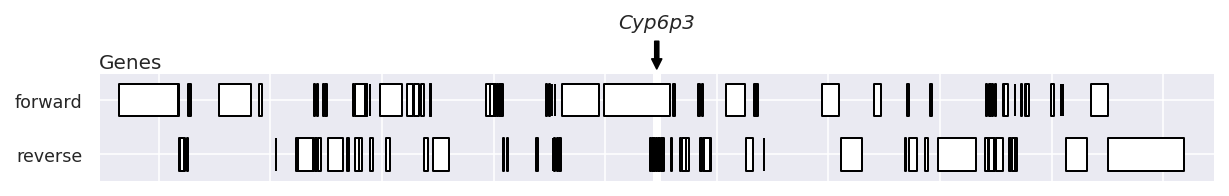

In [17]:
plot_genes(cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 1, cyp6p3['Name'])

In [19]:
def fig_locus_h12(chromosome, center, flank, label, tracks, figw=10, savefig=None,
                  savefig_dpi=150):
    
    figh = .5 + len(tracks) * 2.0

    fig = plt.figure(figsize=(figw, figh), facecolor='w')
    gs = fig.add_gridspec(ncols=1, nrows=1+len(tracks), 
                          height_ratios=[.5] + [2] * len(tracks))
    
    # Genes
    ax = fig.add_subplot(gs[0])
    plot_genes(chromosome, center, flank, label, ax=ax)
    
    # H12
    for i, (pop, kwargs) in enumerate(tracks):
        ax = fig.add_subplot(gs[i+1])
        plot_h12(pop, chromosome, center, flank, ax=ax, **kwargs)
        if i < len(tracks) - 1:
            ax.set_xticklabels([])
    ax.set_xlabel(f"Chromosome {chromosome} position (Mbp)")
   
    fig.tight_layout()
    
    if savefig:
        fig.savefig(savefig, bbox_inches='tight', dpi=savefig_dpi)
    plt.show()
    plt.close()
    

In [20]:
def fig_locus_ihs(chromosome, center, flank, label, tracks, figw=10, savefig=None,
                  savefig_dpi=150):
    
    figh = .5 + len(tracks) * 2.0

    fig = plt.figure(figsize=(figw, figh), facecolor='w')
    gs = fig.add_gridspec(ncols=1, nrows=1+len(tracks), 
                          height_ratios=[.5] + [2] * len(tracks))
    
    # Genes
    ax = fig.add_subplot(gs[0])
    plot_genes(chromosome, center, flank, label, ax=ax)
    
    # iHS
    for i, (pop, kwargs) in enumerate(tracks):
        ax = fig.add_subplot(gs[i+1])
        plot_ihs(pop, chromosome, center, flank, ax=ax, **kwargs)
        if i < len(tracks) - 1:
            ax.set_xticklabels([])
    ax.set_xlabel(f"Chromosome {chromosome} position (Mbp)")
   
    fig.tight_layout()
    
    if savefig:
        fig.savefig(savefig, bbox_inches='tight', dpi=savefig_dpi)
    plt.show()
    plt.close()
    

In [21]:
def fig_locus_xpehh(chromosome, center, flank, label, tracks, figw=10, savefig=None,
                    savefig_dpi=150):
    
    figh = .5 + len(tracks) * 2.0

    fig = plt.figure(figsize=(figw, figh), facecolor='w')
    gs = fig.add_gridspec(ncols=1, nrows=1+len(tracks), 
                          height_ratios=[.5] + [2] * len(tracks))
    
    # Genes
    ax = fig.add_subplot(gs[0])
    plot_genes(chromosome, center, flank, label, ax=ax)
    
    # XP-EHH
    for i, (pop1, pop2, kwargs) in enumerate(tracks):
        ax = fig.add_subplot(gs[i+1])
        plot_xpehh(pop1, pop2, chromosome, center, flank, ax=ax, **kwargs)
        if i < len(tracks) - 1:
            ax.set_xticklabels([])
    ax.set_xlabel(f"Chromosome {chromosome} position (Mbp)")
   
    fig.tight_layout()
    
    if savefig:
        fig.savefig(savefig, bbox_inches='tight', dpi=savefig_dpi)
    plt.show()
    plt.close()
    

In [22]:
def fig_locus_pbs(chromosome, center, flank, label, tracks, figw=10, savefig=None,
                  savefig_dpi=150):
    
    figh = .5 + len(tracks) * 2.0

    fig = plt.figure(figsize=(figw, figh), facecolor='w')
    gs = fig.add_gridspec(ncols=1, nrows=1+len(tracks), 
                          height_ratios=[.5] + [2] * len(tracks))
    
    # Genes
    ax = fig.add_subplot(gs[0])
    plot_genes(chromosome, center, flank, label, ax=ax)
    
    # PBS
    for i, (pop1, pop2, pop3, kwargs) in enumerate(tracks):
        ax = fig.add_subplot(gs[i+1])
        plot_pbs(pop1, pop2, pop3, chromosome, center, flank, ax=ax, **kwargs)
        if i < len(tracks) - 1:
            ax.set_xticklabels([])
    ax.set_xlabel(f"Chromosome {chromosome} position (Mbp)")
   
    fig.tight_layout()
    
    if savefig:
        fig.savefig(savefig, bbox_inches='tight', dpi=savefig_dpi)
    plt.show()
    plt.close()
    
    

## *Gste2*

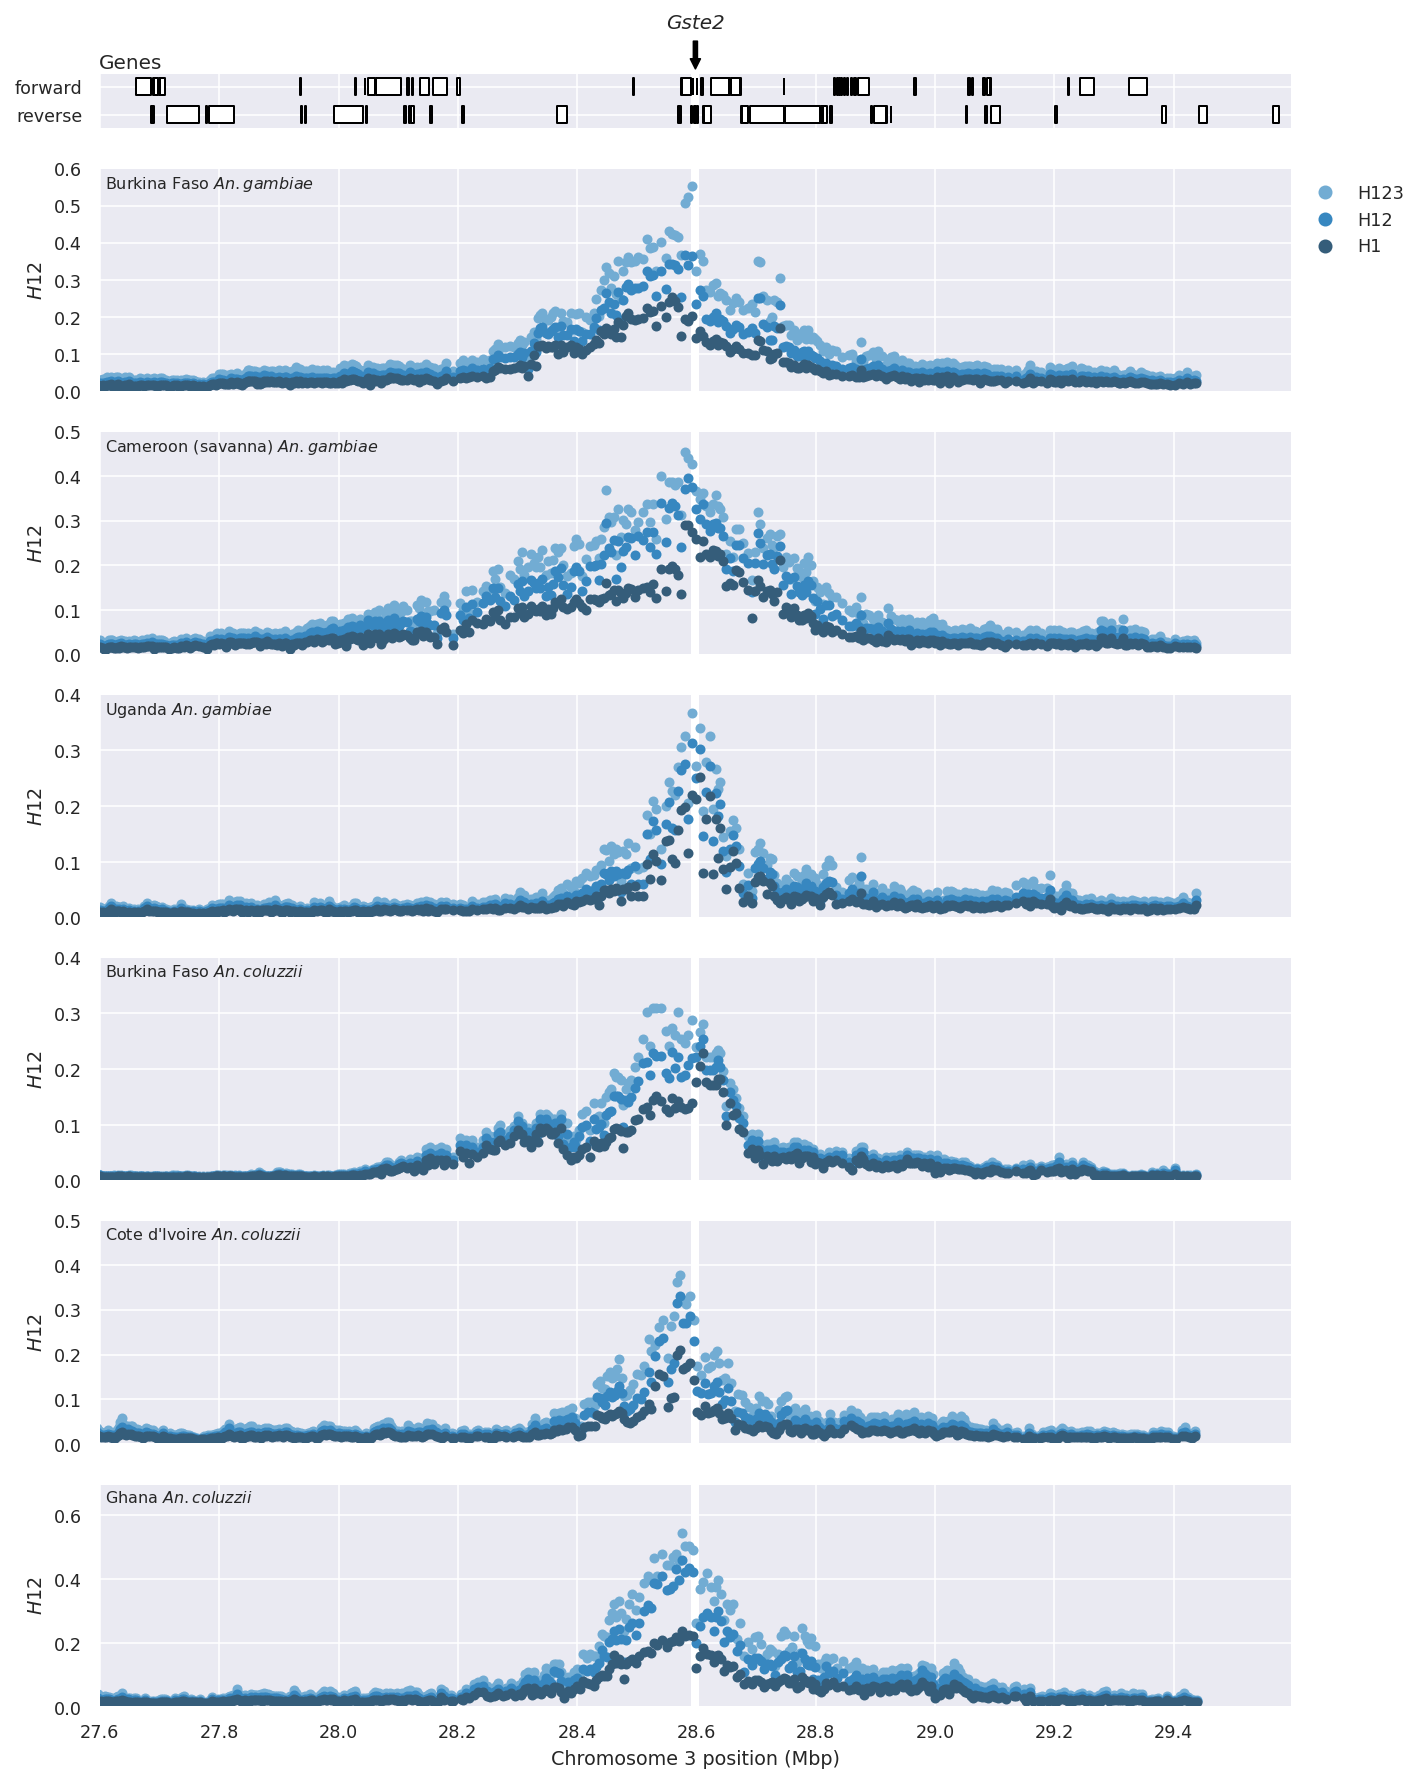

In [30]:
fig_locus_h12(
    gste2.chromosome, gste2.chromosome_center/1e6, 
    flank=1, label=gste2['Name'],
    tracks=(
        ('bf_gam', dict(ymax=.6, step=5, shift=0, legend=True)),
        ('cm_sav_gam', dict(ymax=.5, step=5, shift=0)),
        ('ug_gam', dict(ymax=.4, step=5, shift=0)),
        ('bf_col', dict(ymax=.4, step=5, shift=0)),
        ('ci_col', dict(ymax=.5, step=5, shift=0)),
        ('gh_col', dict(ymax=.7, step=5, shift=0)),
    ),
    savefig=here() / 'artwork/locus_gste2_h12.png'
)

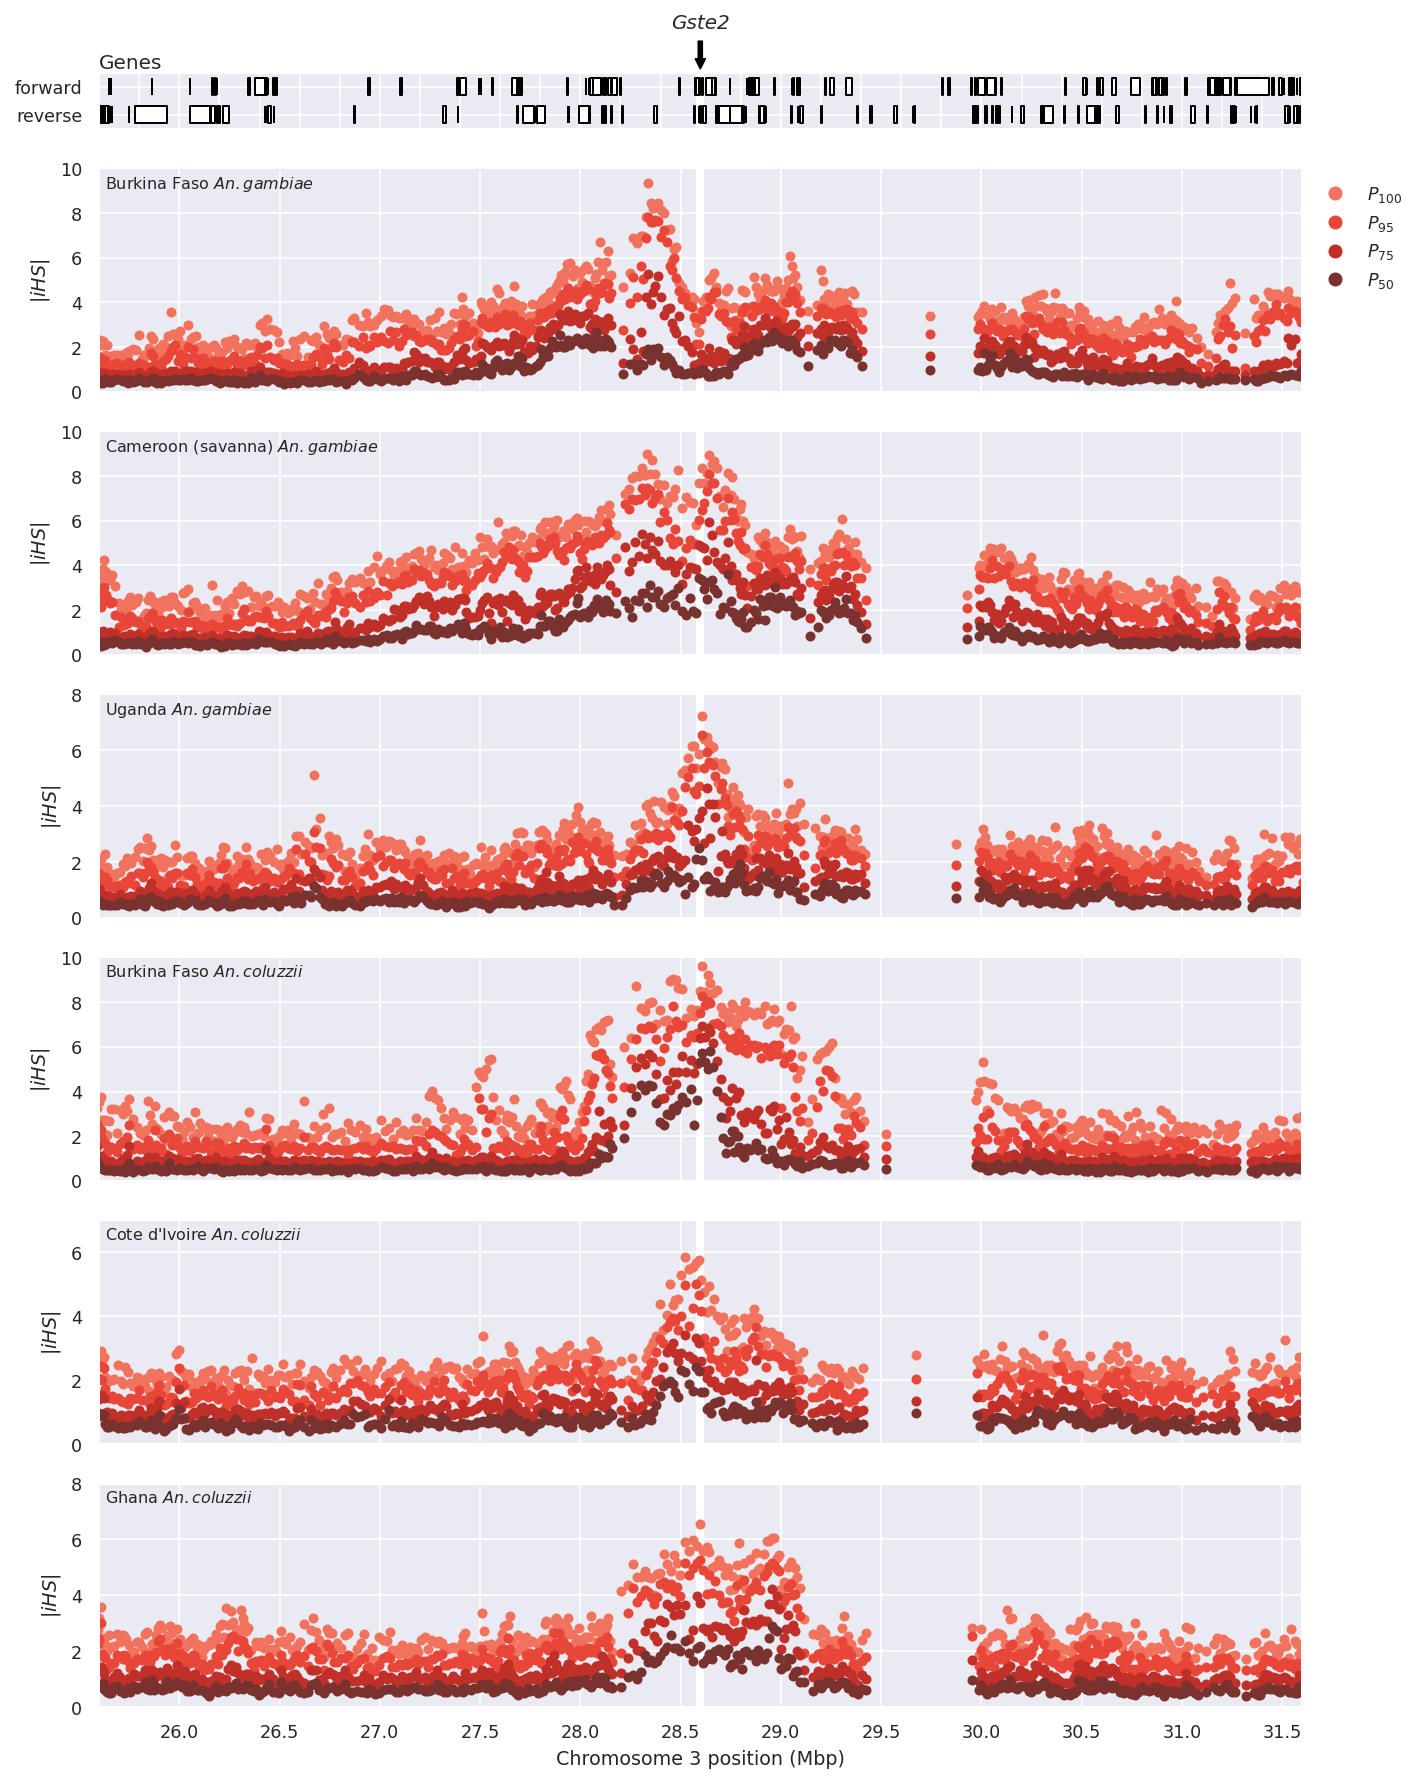

In [47]:
fig_locus_ihs(
    gste2.chromosome, gste2.chromosome_center/1e6, 
    flank=3, label=gste2['Name'],
    tracks=(
        ('bf_gam', dict(ymax=10, step=2, legend=True)),
        ('cm_sav_gam', dict(ymax=10, step=2)),
        ('ug_gam', dict(ymax=8, step=2)),
        ('bf_col', dict(ymax=10, step=2)),
        ('ci_col', dict(ymax=7, step=2)),
        ('gh_col', dict(ymax=8, step=2)),
    ),
    savefig=here() / 'artwork/locus_gste2_ihs.png'
)

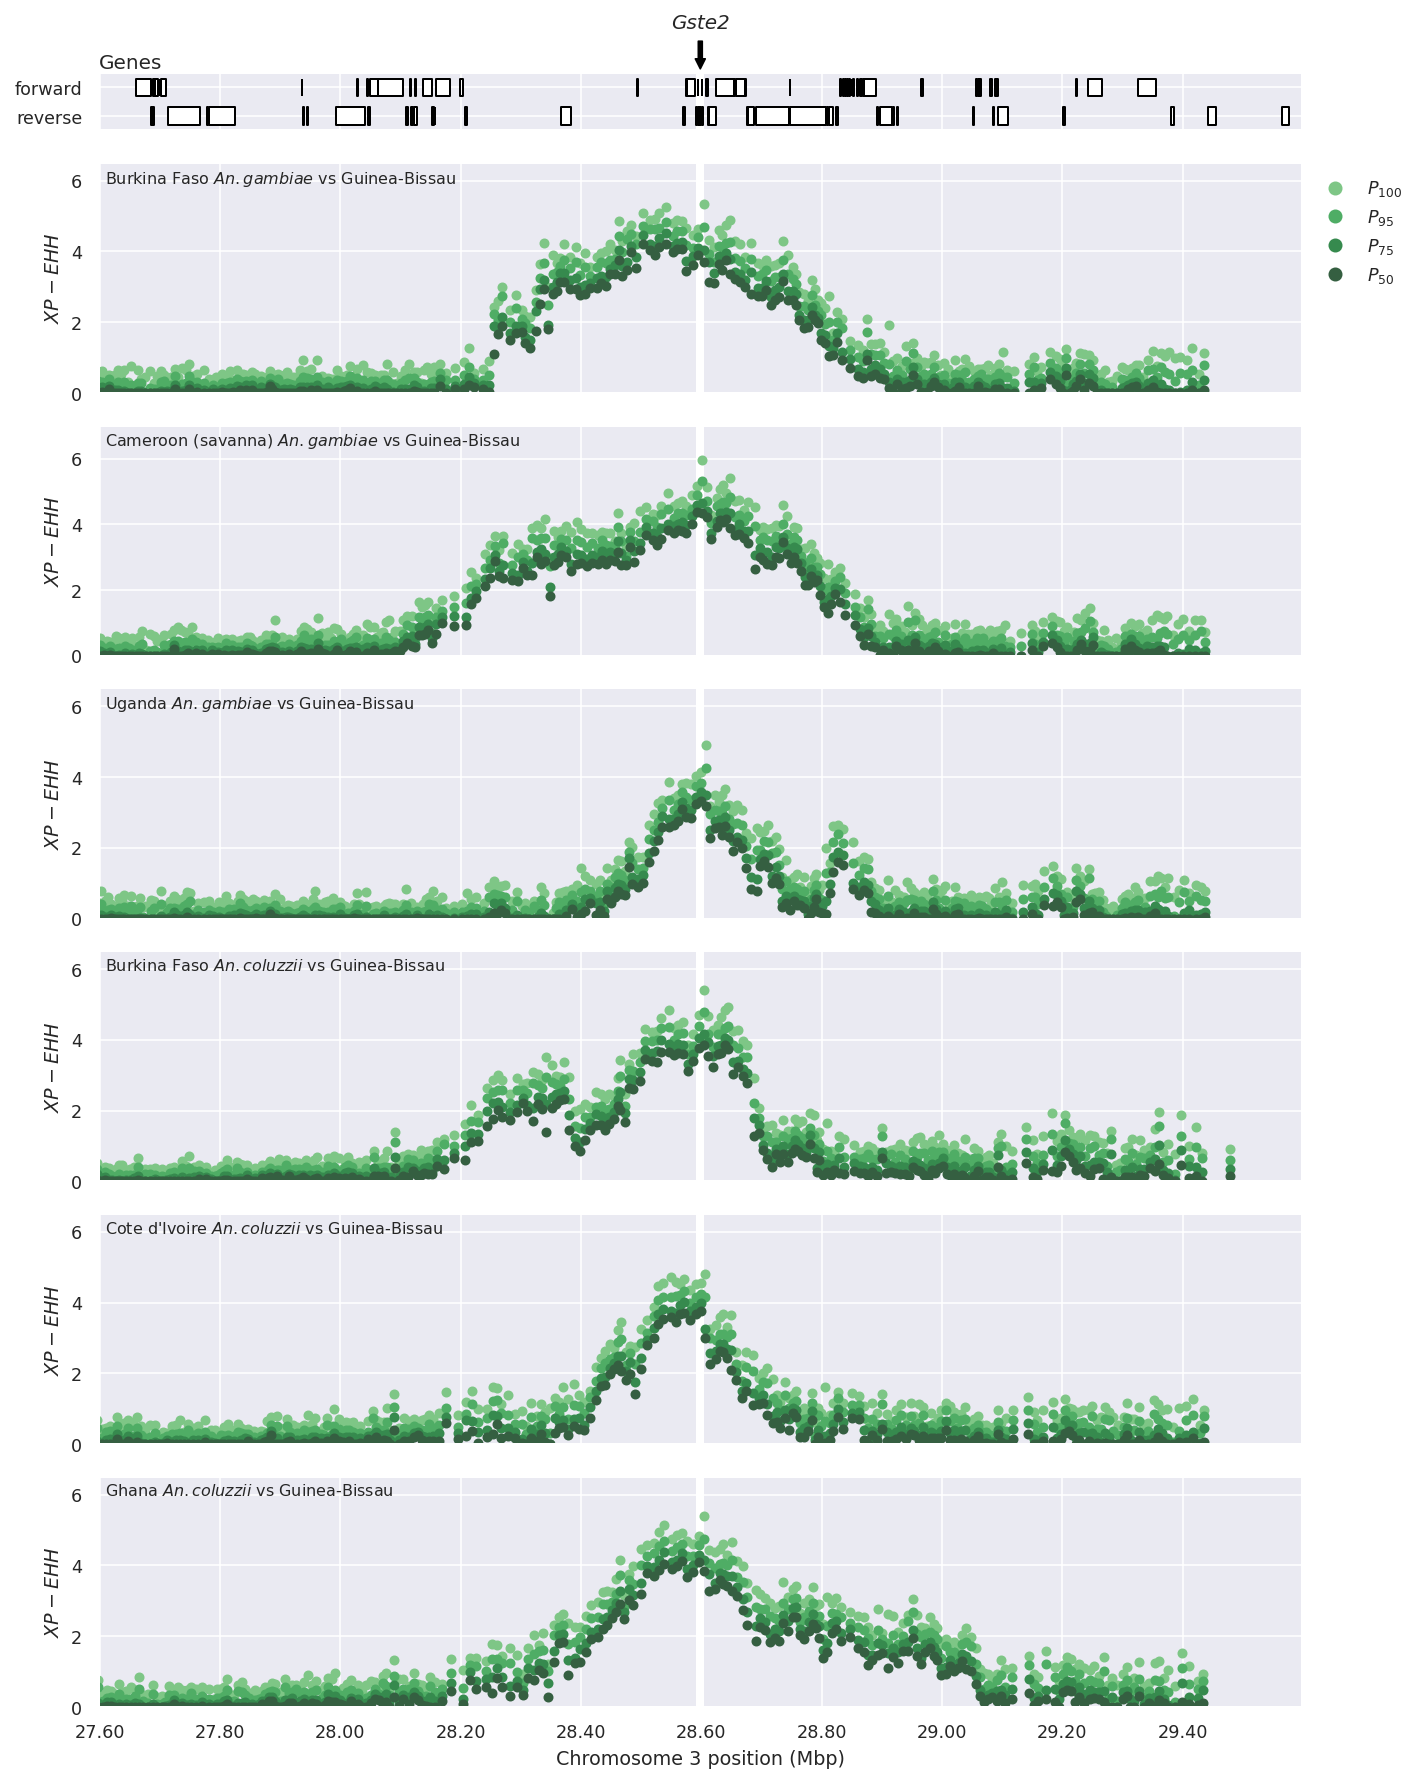

In [46]:
fig_locus_xpehh(
    gste2.chromosome, gste2.chromosome_center/1e6, 
    flank=1, label=gste2['Name'],
    tracks=(
        ('bf_gam', 'gw', dict(ymax=6.5, step=2, legend=True)),
        ('cm_sav_gam', 'gw', dict(ymax=7, step=2)),
        ('ug_gam', 'gw', dict(ymax=6.5, step=2)),
        ('bf_col', 'gw', dict(ymax=6.5, step=2)),
        ('ci_col', 'gw', dict(ymax=6.5, step=2)),
        ('gh_col', 'gw', dict(ymax=6.5, step=2)),
    ),
    savefig=here() / 'artwork/locus_gste2_xpehh.png'
)

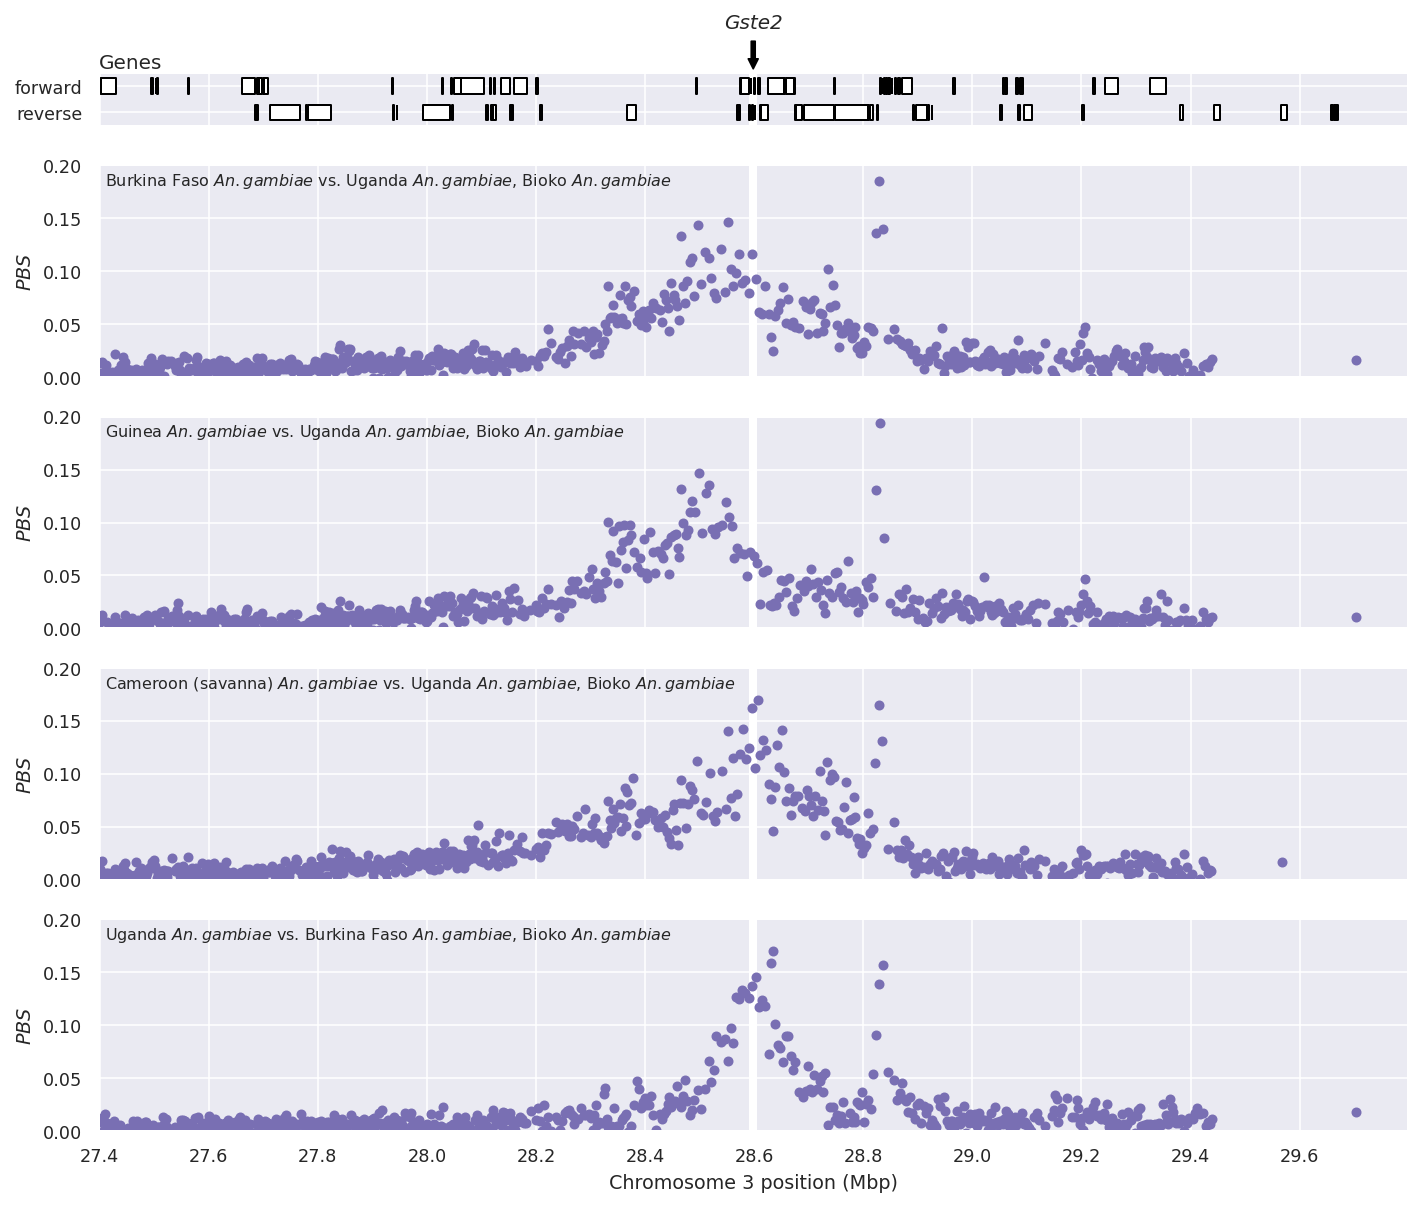

In [52]:
fig_locus_pbs(
    gste2.chromosome, gste2.chromosome_center/1e6, 
    flank=1.2, label=gste2['Name'],
    tracks=(
        ('bf_gam', 'ug_gam', 'gq_gam', dict(ymax=.2)),
        ('gn_gam', 'ug_gam', 'gq_gam', dict(ymax=.2)),
        ('cm_sav_gam', 'ug_gam', 'gq_gam', dict(ymax=.2)),
        ('ug_gam', 'bf_gam', 'gq_gam', dict(ymax=.2)),
    ),
    savefig=here() / 'artwork/locus_gste2_pbs.png'
)

## *Cyp6p3*

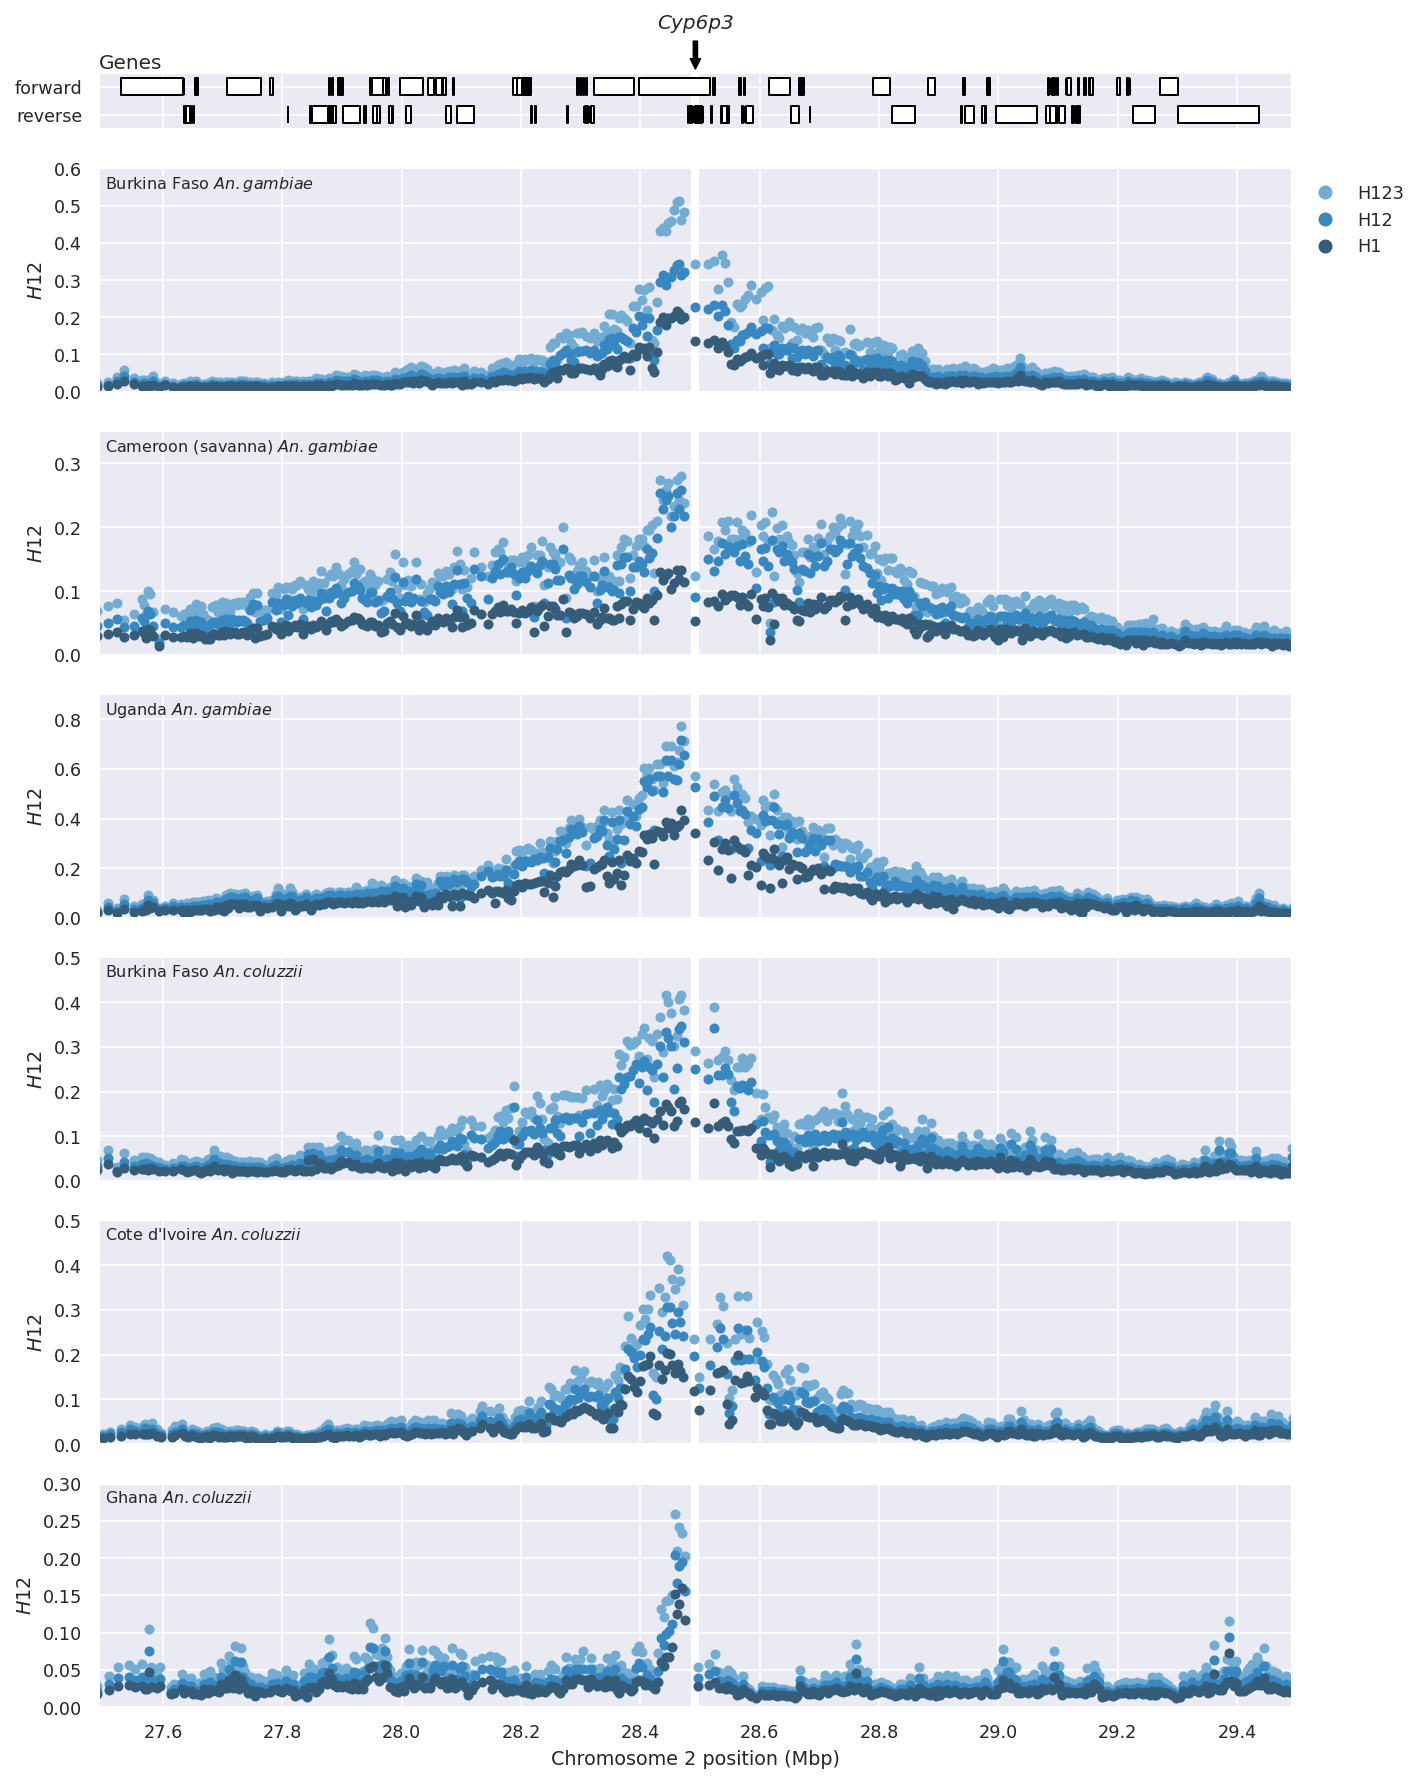

In [32]:
fig_locus_h12(
    cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 
    flank=1, label=cyp6p3['Name'],
    tracks=(
        ('bf_gam', dict(ymax=.6, step=5, shift=3, legend=True)),
        ('cm_sav_gam', dict(ymax=.35, step=5, shift=3)),
        ('ug_gam', dict(ymax=.9, step=5, shift=3)),
        ('bf_col', dict(ymax=.5, step=5, shift=3)),
        ('ci_col', dict(ymax=.5, step=5, shift=3)),
        ('gh_col', dict(ymax=.3, step=5, shift=3)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_h12.png'
)

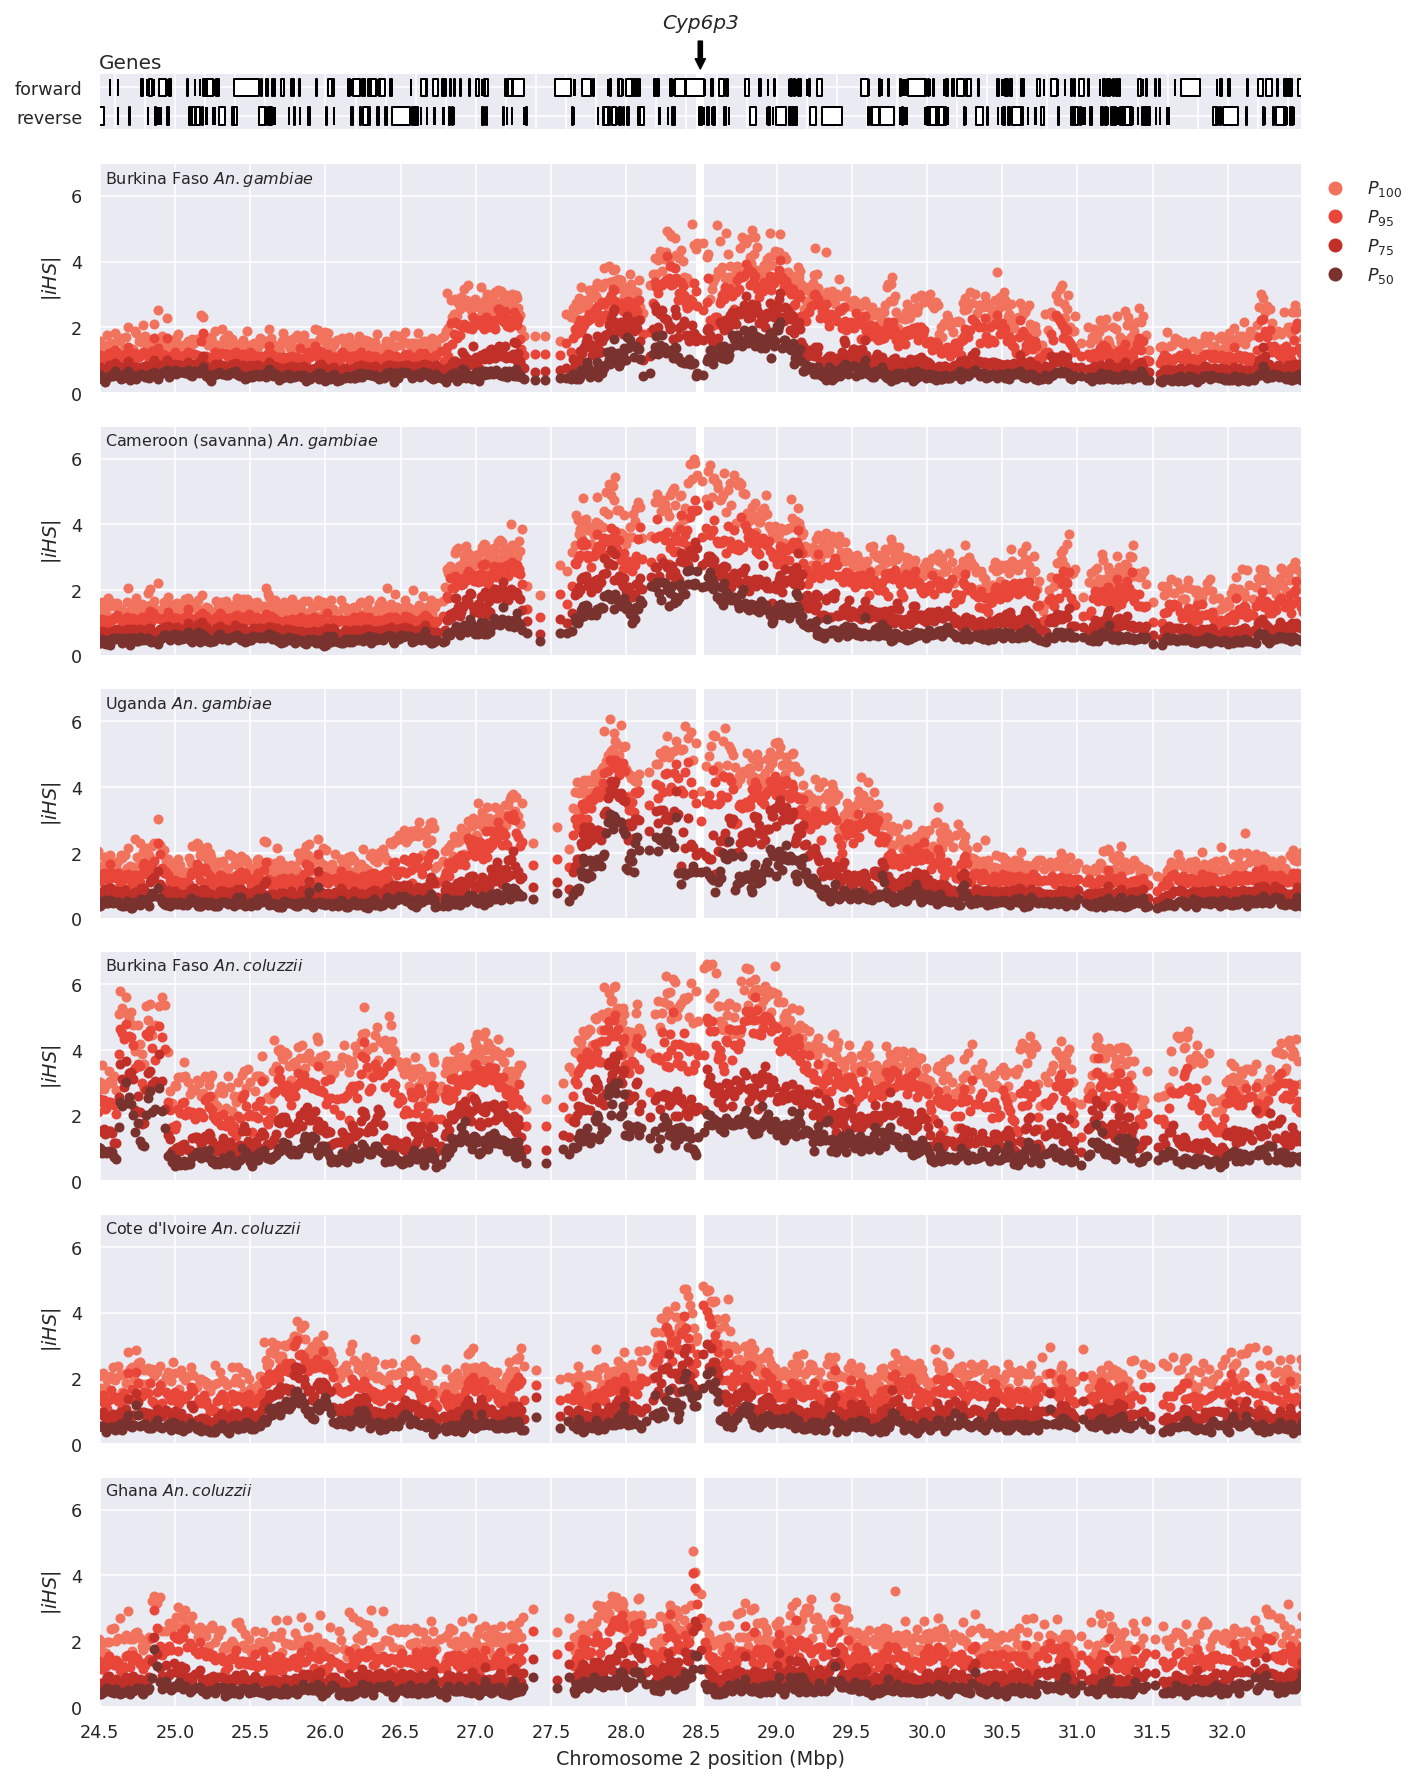

In [33]:
fig_locus_ihs(
    cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 
    flank=4, label=cyp6p3['Name'],
    tracks=(
        ('bf_gam', dict(ymax=7, step=2, legend=True)),
        ('cm_sav_gam', dict(ymax=7, step=2)),
        ('ug_gam', dict(ymax=7, step=2)),
        ('bf_col', dict(ymax=7, step=2)),
        ('ci_col', dict(ymax=7, step=2)),
        ('gh_col', dict(ymax=7, step=2)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_ihs.png'
)

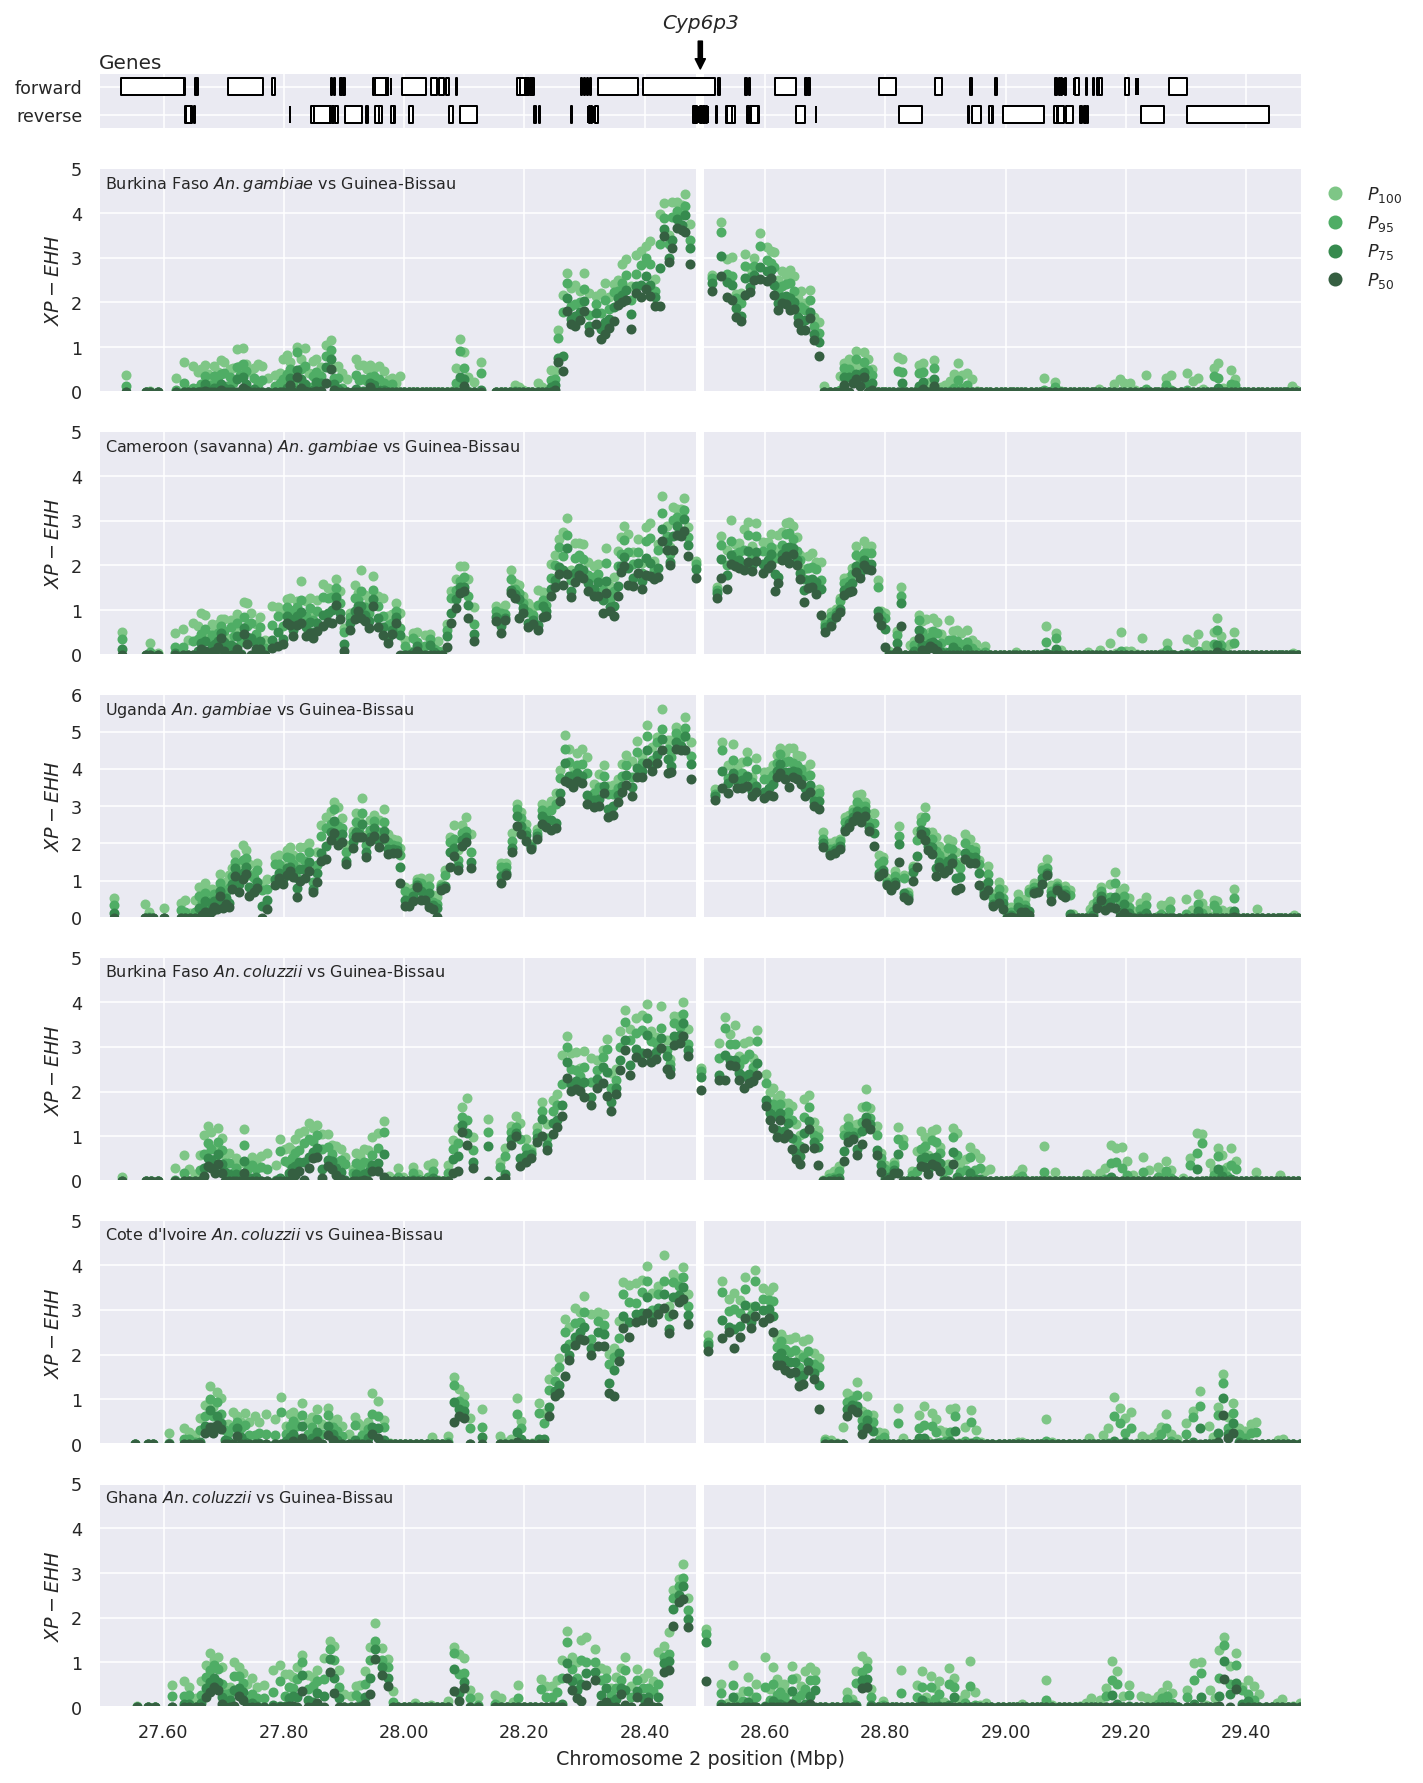

In [36]:
fig_locus_xpehh(
    cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 
    flank=1, label=cyp6p3['Name'],
    tracks=(
        ('bf_gam', 'gw', dict(ymax=5, step=2, shift=0, legend=True)),
        ('cm_sav_gam', 'gw', dict(ymax=5, step=2, shift=0)),
        ('ug_gam', 'gw', dict(ymax=6, step=2, shift=0)),
        ('bf_col', 'gw', dict(ymax=5, step=2, shift=0)),
        ('ci_col', 'gw', dict(ymax=5, step=2, shift=0)),
        ('gh_col', 'gw', dict(ymax=5, step=2, shift=0)),
    ),
    savefig=here() / 'artwork/locus_cyp6p3_xpehh.png'
)

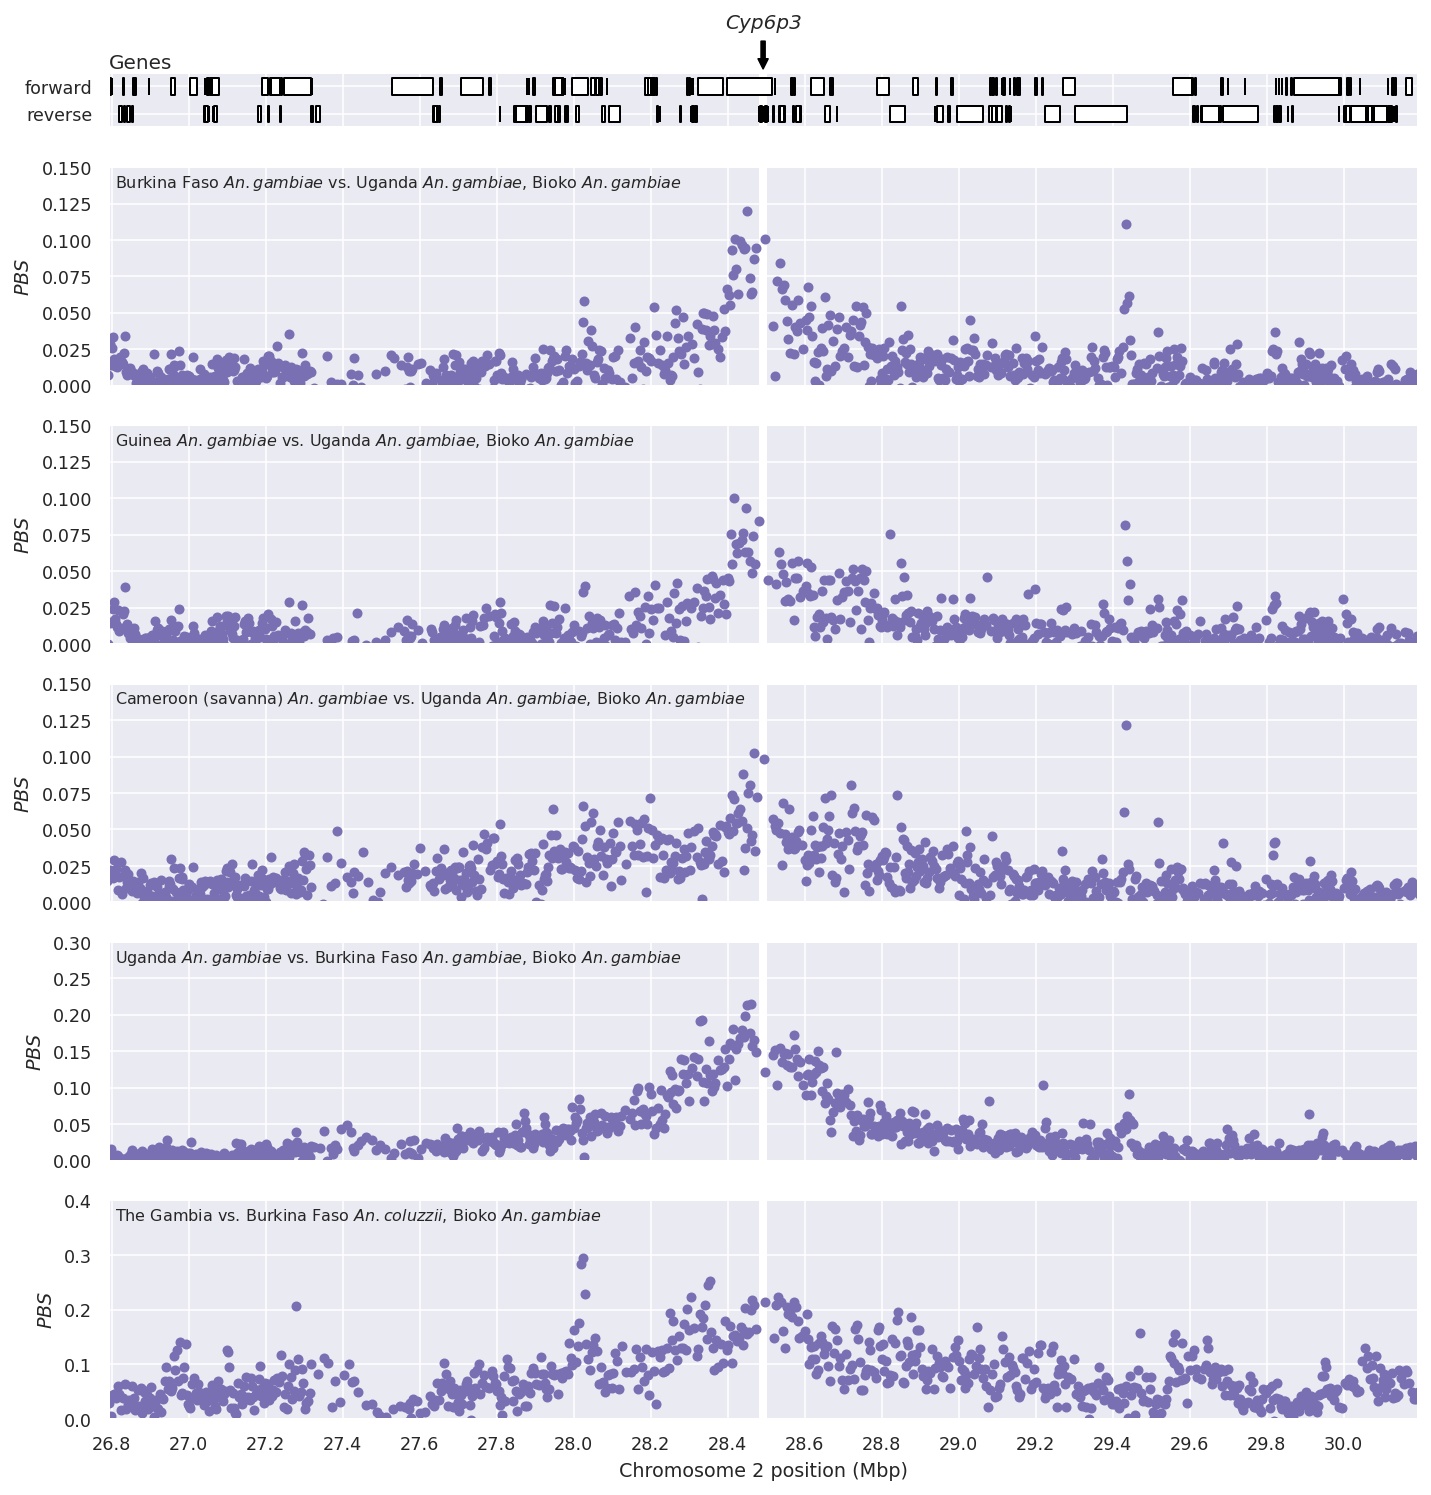

In [37]:
fig_locus_pbs(
    cyp6p3.chromosome, cyp6p3.chromosome_center/1e6, 
    flank=1.7, label=cyp6p3['Name'],
    tracks=(
        ('bf_gam', 'ug_gam', 'gq_gam', dict(ymax=.15)),
        ('gn_gam', 'ug_gam', 'gq_gam', dict(ymax=.15)),
        ('cm_sav_gam', 'ug_gam', 'gq_gam', dict(ymax=.15)),
        ('ug_gam', 'bf_gam', 'gq_gam', dict(ymax=.3)),
        ('gm', 'bf_col', 'gq_gam', dict(ymax=.4)),
        
    ),
    savefig=here() / 'artwork/locus_cyp6p3_pbs.png'
)